# Simulacre Prova escrita 2 - Estadística.

## Autor: <victor_piñana_cortes>

#### Consulta al professor quan hagis aconseguit cada gràfic que es demana.

#### Criteris d'avaluació.

##### Part 1 = 3,5 punts, Part 2 = 2,5 punts, Part 3 = 2 punts, Part 4 = 2 punts. Total = 10 punts.

<hr/>

## Part 1. Preguntes bàsiques, gestió de valors NA, i outliers. (3,5 punts)

### Preguntes bàsiques. 1.5 punts.
### Gràfic d'outliers. 2 punts.

Us donem el codi de la importació i el context de les dades.

### Importació del Dataset

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [73]:
incidence_raw = pd.read_csv("incidence-rate-2020.csv", sep=';', decimal=",")

incidence_new = copy.deepcopy(incidence_raw)

print(incidence_raw.dtypes)

print(incidence_raw.head(20))

GROUP                   object
CODE                    object
NAME                    object
YEAR                     int64
DISEASE                 object
DISEASE_DESCRIPTION     object
DENOMINATOR             object
INCIDENCE_RATE         float64
dtype: object
          GROUP CODE            NAME  YEAR     DISEASE DISEASE_DESCRIPTION  \
0     Countries  AFG     Afghanistan  1980      YFEVER        Yellow fever   
1     Countries  AFG     Afghanistan  1980    NTETANUS    Neonatal tetanus   
2     Countries  AFG     Afghanistan  1980    TTETANUS       Total tetanus   
3     Countries  AFG     Afghanistan  1980     MEASLES             Measles   
4     Countries  AFG     Afghanistan  1980       POLIO       Poliomyelitis   
5     Countries  AFG     Afghanistan  1980  DIPHTHERIA          Diphtheria   
6     Countries  AFG     Afghanistan  1980   PERTUSSIS           Pertussis   
7   WHO Regions  afr  African Region  1980  DIPHTHERIA          Diphtheria   
8   WHO Regions  afr  African Region

### Explicació del context. Què son aquestes dades? Posar referències.

Representen els ratios d'incidencia de casos de diferents enfermedades contagioses en molts països. 
Aquest ratio està representat pel camp **INCIDENCE_RATE.**

S'utilitzen diverses maneres de calcular aquestes ratios, ho indica el camp **DENOMINATOR.**
No és el mateix mesurar 'per 1,000,000 total population' que ';per 1,000,000 <15 population'

**GROUP** Pot ser un país, una agrupació de països o un estat.

**CODE** és la abreviatura del nom del país/estat/grup **NAME** .

**DISEASE** és el nom de la enfermetat.

**YEAR**: Des de 1980 a 2021

#### Referència:

Dataset extret del portal Inmunization Data, de la WHO (la OMS)

[https://immunizationdata.who.int/listing.html?topic=&location=]

#### Quantes files té el dataset ? 

In [74]:
# Posa aquí el teu codi
incidence_new.shape[0] 

72138

### Llista els valors possibles que poden tenir els camps DENOMINATOR i el DISEASE.

In [75]:
# Posa aquí el teu codi
incidence_raw['DENOMINATOR'].unique()


array(['per 1,000,000 total population', 'per 1,000 live births',
       'per 1,000,000 <15 population', 'per 1000 live births',
       'per 10,000 live births'], dtype=object)

In [76]:
# Posa aquí el teu codi
incidence_raw['DISEASE'].unique()

array(['YFEVER', 'NTETANUS', 'TTETANUS', 'MEASLES', 'POLIO', 'DIPHTHERIA',
       'PERTUSSIS', 'CRS', 'RUBELLA', 'MUMPS', 'JAPENC'], dtype=object)

### Optimització del dataframe.

Elimina la fila "DISEASE_DESCRIPTION". No és necessari tenir aquesta fila dins d'aquesta taula.

En SQL aquests valors estarien en una taula apart, accessible des d'una foreign key comuna entre les 2 taules, que seria DISEASE.

In [77]:
# Posa aquí el teu codi
incidence_raw.drop(columns='DISEASE_DESCRIPTION', inplace=True)

display(incidence_raw)


,GROUP,CODE,NAME,YEAR,DISEASE,DENOMINATOR,INCIDENCE_RATE
0,Countries,AFG,Afghanistan,1980,YFEVER,"per 1,000,000 total population",0.0
1,Countries,AFG,Afghanistan,1980,NTETANUS,"per 1,000 live births",0.0
2,Countries,AFG,Afghanistan,1980,TTETANUS,"per 1,000,000 total population",121.1
3,Countries,AFG,Afghanistan,1980,MEASLES,"per 1,000,000 total population",2429.9
4,Countries,AFG,Afghanistan,1980,POLIO,"per 1,000,000 <15 population",142.7
...,...,...,...,...,...,...,...
72133,Countries,ZWE,Zimbabwe,2020,MEASLES,"per 1,000,000 total population",0.2
72134,Countries,ZWE,Zimbabwe,2020,RUBELLA,"per 1,000,000 total population",0.9
72135,Countries,ZWE,Zimbabwe,2020,POLIO,"per 1,000,000 <15 population",0.0
72136,Countries,ZWE,Zimbabwe,2020,DIPHTHERIA,"per 1,000,000 total population",0.0


### Hi ha NAs? En quines columnes ? Quina columna en té més ? 

In [78]:
# Posa aquí el teu codi
print(incidence_raw.isnull().value_counts())
print(incidence_raw.isnull().isna().sum())


# NO Hi ha Nas
# Pero si, valors 0, a INCIDENCE_RATE

GROUP  CODE   NAME   YEAR   DISEASE  DENOMINATOR  INCIDENCE_RATE
False  False  False  False  False    False        False             55802
                                                  True              16336
dtype: int64
GROUP             0
CODE              0
NAME              0
YEAR              0
DISEASE           0
DENOMINATOR       0
INCIDENCE_RATE    0
dtype: int64


### Separar el dataframe en 2 parts: les files que tenen el GROUP = Countries i els que tenen GROUP = WHO_REGIONS.

#### Guarda els 2 dataframes en 2 fitxers. Us proporcionem una còpia dels fitxers a la carpeta output per si no us surt.

In [79]:

# Posa aquí el teu codi i descomenta la línia de baix
#df_incidence_regions: pd.DataFrame = incidence_raw.query("GROUP == 'Countries'")
df_incidence_regions = pd.read_csv("incidence_rate_2020_regions.csv", sep=',', decimal=",")

display(df_incidence_regions)

#df_incidence_regions.to_csv('incidence_rate_2020_regions.csv', index=False)

# Posa aquí el teu codi i descomenta la línia de baix
#df_incidence_countries: pd.DataFrame = incidence_raw.query("GROUP == 'WHO Regions'")
df_incidence_countries = pd.read_csv("incidence_rate_2020_countries.csv", sep=';', decimal=",")

display(df_incidence_countries)

#df_incidence_countries.to_csv('incidence_rate_2020_countries.csv', index=False, sep=';', decimal=",")

,GROUP,CODE,NAME,YEAR,DISEASE,DENOMINATOR,INCIDENCE_RATE
0,Countries,AFG,Afghanistan,1980,YFEVER,"per 1,000,000 total population",0.0
1,Countries,AFG,Afghanistan,1980,NTETANUS,"per 1,000 live births",0.0
2,Countries,AFG,Afghanistan,1980,TTETANUS,"per 1,000,000 total population",121.1
3,Countries,AFG,Afghanistan,1980,MEASLES,"per 1,000,000 total population",2429.9
4,Countries,AFG,Afghanistan,1980,POLIO,"per 1,000,000 <15 population",142.7
...,...,...,...,...,...,...,...
69548,Countries,ZWE,Zimbabwe,2020,MEASLES,"per 1,000,000 total population",0.2
69549,Countries,ZWE,Zimbabwe,2020,RUBELLA,"per 1,000,000 total population",0.9
69550,Countries,ZWE,Zimbabwe,2020,POLIO,"per 1,000,000 <15 population",0.0
69551,Countries,ZWE,Zimbabwe,2020,DIPHTHERIA,"per 1,000,000 total population",0.0


,GROUP,CODE,NAME,YEAR,DISEASE,DENOMINATOR,INCIDENCE_RATE
0,WHO Regions,afr,African Region,1980,DIPHTHERIA,"per 1,000,000 total population",25.0
1,WHO Regions,afr,African Region,1980,YFEVER,"per 1,000,000 total population",0.3
2,WHO Regions,afr,African Region,1980,TTETANUS,"per 1,000,000 total population",51.0
3,WHO Regions,afr,African Region,1980,PERTUSSIS,"per 1,000,000 total population",1180.0
4,WHO Regions,afr,African Region,1980,NTETANUS,per 1000 live births,0.6
...,...,...,...,...,...,...,...
2204,WHO Regions,wpr,Western Pacific Region,2020,NTETANUS,per 1000 live births,0.0
2205,WHO Regions,wpr,Western Pacific Region,2020,POLIO,"per 1,000,000 <15 population",0.0
2206,WHO Regions,wpr,Western Pacific Region,2020,JAPENC,"per 1,000,000 total population",0.3
2207,WHO Regions,wpr,Western Pacific Region,2020,CRS,"per 10,000 live births",0.0


### Gràfics d'Outliers.

Des del fitxer <em>incidence_rate_2020_countries.csv<em> o des del dataframe que has aconseguit; 
crea un gràfic plotbox de les enfermetats que es mesuren amb el denominador: 'per 1,000,000 total population'.

<em>Pista: Recomanem fer-lo amb seaborn, que permet seleccionar quina fila i columna volem posar al gràfic<em>

<AxesSubplot:xlabel='INCIDENCE_RATE', ylabel='DISEASE'>

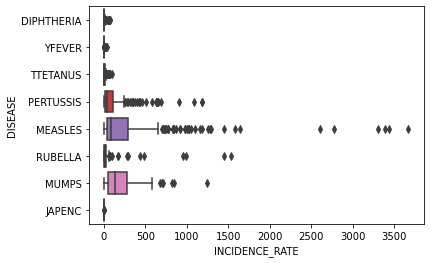

In [80]:
#Posa aquí la teva solució
df_per1M_pop = df_incidence_countries.query("DENOMINATOR == 'per 1,000,000 total population'") 
sns.boxplot(data=df_per1M_pop, x="INCIDENCE_RATE", y='DISEASE')

### Ara, fes un plotbox de les enfermetats a Espanya.

In [81]:
# # Posa aquí la teva solució
df_per1M_pop = df_incidence_countries.query("DENOMINATOR == 'per 1,000,000 total population'") 
esp_incidence_rate = df_per1M_pop.query("CODE == 'ESP'")
sns.boxplot(data=esp_incidence_rate, x='INCIDENCE_RATE', y='DISEASE')



ValueError: min() arg is an empty sequence

### Part 2 - Fes una gràfica de línies (o similar) on es vegi la incidència de 3 enfermetats a Espanya des del 1980 fins el 2020, ambdós inclosos. (2,5 punts)

Per exemple: MEASLES, MUMPS, PERTUSSIS. 
<em>Serien: paperes, xarampió, tos ferina.</em>

<AxesSubplot:>

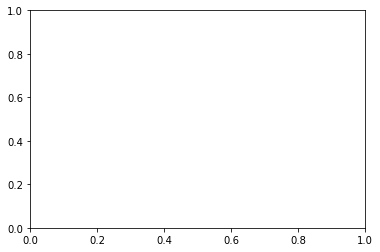

In [ ]:
# Posa aquí la teva solució
esp_incidence_rate_year = esp_incidence_rate.query("YEAR >= 1980 & YEAR <= 2020")
sns.lineplot(data=esp_incidence_rate_year, x='YEAR', y='DISEASE')

## Part 3. Crea un gràfic que serveixin per comparar les dades de sarampió (measles) a Espanya i almenys a 2 països més. (2 punts)

<AxesSubplot:>

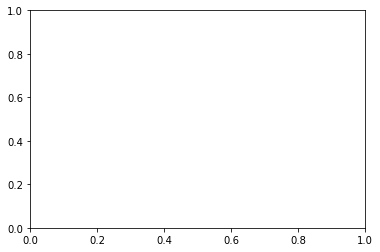

In [ ]:
df_incidence_countries_esp = df_incidence_countries.query("CODE == 'ESP'")
df_incidence_countries_esp_sar = df_incidence_countries_esp.query("DISEASE == 'MEASLES'")

df_incidence_countries_ago = df_incidence_countries.query("CODE == 'AGO'")
df_incidence_countries_ago_sar = df_incidence_countries_ago.query("DISEASE == 'MEASLES'")

df_incidence_countries_bel = df_incidence_countries.query("CODE == 'BEL'")
df_incidence_countries_bel_sar = df_incidence_countries_bel.query("DISEASE == 'MEASLES'")

sns.lineplot(data = df_incidence_countries_esp_sar, x='YEAR', y='INCIDENCE_RATE')
sns.lineplot(data = df_incidence_countries_ago_sar, x='YEAR', y='INCIDENCE_RATE')
sns.lineplot(data = df_incidence_countries_bel_sar, x='YEAR', y='INCIDENCE_RATE')

## Part 4. Scatterplots i/o recta de regressió entre parelles d'enfermetats. (2 punts)

Ens demanen comparar aquestes parelles d'enfermetats; per saber si existeix correlació entre elles.

Com a mínim ens demanen estudiar aquestes:

1. PERTUSSIS i MEASELS. 
2. MUMPS i PERTUSSIS.

In [ ]:
# Posa aquí la teva solució

### Creus que hi ha una bona correlació entre aquests parells d'enfermetats ? 

RESPOSTA.
